In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
# Charger les données depuis le CSV
df = pd.read_csv('data/selected.csv')

# Nombre de villes
num_cities = len(df)

In [3]:
# Construire la matrice de distances à partir des coordonnées (utilisation de la distance euclidienne)
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        lat1, lon1 = df.iloc[i][' Latitude '], df.iloc[i][' Longitude ']
        lat2, lon2 = df.iloc[j][' Latitude '], df.iloc[j][' Longitude ']
        distances[i, j] = np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)


In [4]:
# Fonction pour calculer la distance totale d'un chemin
def total_distance(path, distances):
    total_dist = 0
    num_cities = len(path)
    for i in range(num_cities):
        total_dist += distances[path[i], path[(i + 1) % num_cities]]
    return total_dist

In [5]:
# Fonction pour générer un voisin en échangeant deux villes dans le chemin
def generate_neighbor(path):
    new_path = path.copy()
    idx1, idx2 = np.random.choice(len(path), 2, replace=False)
    new_path[idx1], new_path[idx2] = new_path[idx2], new_path[idx1]
    return new_path

In [6]:
# Algorithme du recuit simulé
def simulated_annealing(distances, initial_path, max_iterations, initial_temperature, cooling_rate):
    current_path = initial_path
    best_path = initial_path
    current_distance = total_distance(current_path, distances)
    best_distance = current_distance
    temperature = initial_temperature

    for i in range(max_iterations):
        neighbor_path = generate_neighbor(current_path)
        neighbor_distance = total_distance(neighbor_path, distances)
        delta_distance = neighbor_distance - current_distance

        # Si le voisin est meilleur ou selon une certaine probabilité, acceptez le voisin
        if delta_distance < 0 or np.random.rand() < np.exp(-delta_distance / temperature):
            current_path = neighbor_path
            current_distance = neighbor_distance

            # Mettez à jour le meilleur chemin trouvé jusqu'à présent
            if current_distance < best_distance:
                best_path = current_path
                best_distance = current_distance

        # Refroidissement
        temperature *= cooling_rate

    return best_path, best_distance

In [13]:
# Paramètres de l'algorithme
max_iterations = 10000  # Nombre maximum d'itérations
initial_temperature = 1000.0  # Température initiale
cooling_rate = 0.995  # Taux de refroidissement

# Génération d'un chemin initial aléatoire
initial_path = np.random.permutation(num_cities)

# Application de l'algorithme du recuit simulé
best_path, best_distance = simulated_annealing(distances, initial_path, max_iterations, initial_temperature, cooling_rate)

# Afficher le meilleur chemin et sa distance
print("Meilleur chemin trouvé:", best_path)
print("Distance minimale:", best_distance)


Meilleur chemin trouvé: [24  7 23 36  9 14 29 33 31  6 18  2 11  3 28 22 20 32 38 10  4  8 30 12
  0 21 19 39  5 26  1 17 35 34 25 27 37 15 16 13]
Distance minimale: 53.527858060067835


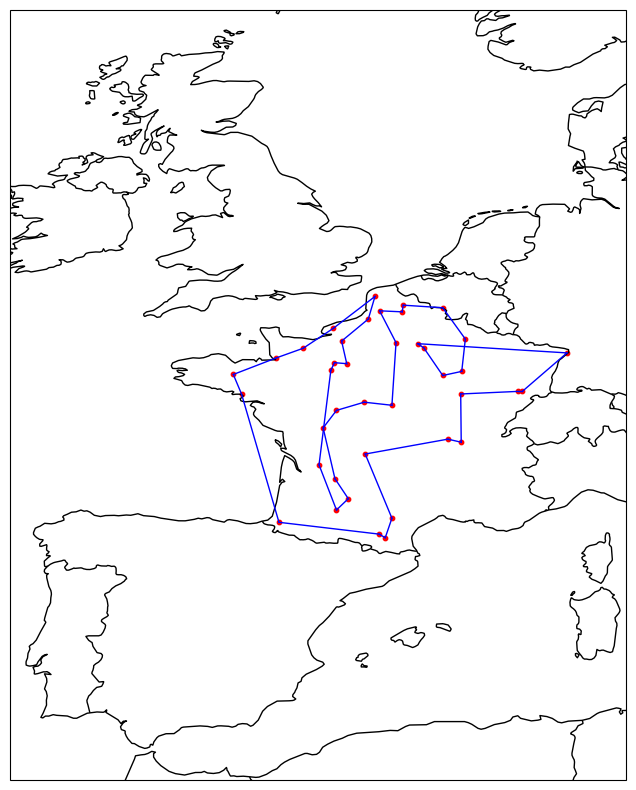

In [18]:
# Afficher le meilleur chemin sur la carte
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Créer une carte
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 10, 35, 60], crs=ccrs.PlateCarree())


# Ajouter les frontières des pays
ax.add_feature(cfeature.BORDERS)


# Ajouter les côtes
ax.add_feature(cfeature.COASTLINE)


# Ajouter les villes
plt.scatter(df[' Longitude '], df[' Latitude '], color='red', s=10, transform=ccrs.PlateCarree())


# Ajouter le chemin indiqué par les indices des villes dans le meilleur chemin
for i in range(num_cities):
    plt.plot([df.iloc[best_path[i]][' Longitude '], df.iloc[best_path[(i + 1) % num_cities]][' Longitude ']],
             [df.iloc[best_path[i]][' Latitude '], df.iloc[best_path[(i + 1) % num_cities]][' Latitude ']],
             color='blue', linewidth=1, transform=ccrs.PlateCarree())

plt.show()
